<a href="https://colab.research.google.com/github/ethanleep/Deep-Image-Analogy-PyTorch/blob/master/Deep_Image_Analogy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Make sure Runtime is set to GPU accelerated and that the images are the same size

In [1]:
#@title Clone the repository, install requirements, and setup environment
from IPython.display import clear_output
from google.colab import files
from PIL import Image
from IPython.display import Image as picture
!git clone https://github.com/ethanleep/Deep-Image-Analogy-PyTorch
!pip install utils
%cd Deep-Image-Analogy-PyTorch
direc = 5
clear_output()

Success


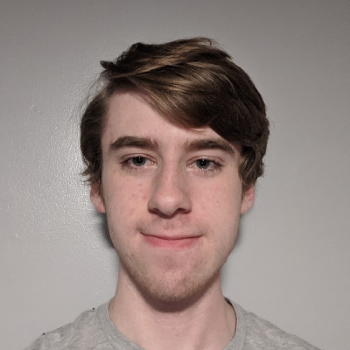

In [4]:
#@title Upload image 1 (.png only)
!rm -rf image
!mkdir image
uploaded = files.upload()
photo = list(uploaded.keys())
photo = photo[0]
!cp "$photo" image/ima.png
!rm "$photo"
im = Image.open("image/ima.png")
width1, height1 = im.size
clear_output()
print("Success")
display(picture("image/ima.png"))

Success


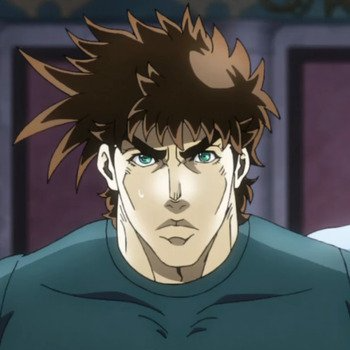

In [5]:
#@title Upload image 2 (.png only)
uploaded = files.upload()
photo = list(uploaded.keys())
photo = photo[0]
!cp "$photo" image/imb.png
!rm "$photo"
im = Image.open("image/imb.png")
width2, height2 = im.size
clear_output()
if ((width1 != width2) or (height1 != height2)):
  print("Failure:Images are not the same size")
else:
  print("Success")
  display(picture("image/imb.png"))

Images loaded successfully!

##### Deep Image Analogy - start #####
Downloading: "https://storage.googleapis.com/vgg-19/vgg19-d01eb7cb.pth" to /root/.cache/torch/hub/checkpoints/vgg19-d01eb7cb.pth
100% 548M/548M [00:08<00:00, 68.7MB/s]
Features extracted!

### current stage: 5 - start ###
- NNF search for ann_AB
	patch_size:3; num_iters:10; rand_search_radius:32
	Elapse: 0:00:02
- NNF search for ann_BA
	patch_size:3; num_iters:10; rand_search_radius:32
	Elapse: 0:00:02
- deconvolution for feat A'
	state:LBFGS REACH MAX ITER
	end_loss/init_loss: 109854544.68/489628351.37
	Elapse: 0:03:56
- deconvolution for feat B
	state:LBFGS REACH MAX ITER
	end_loss/init_loss: 57639098.82/252367066.74
	Elapse: 0:03:50
### current stage: 5 - end | Elapse: 0:07:52 ###

### current stage: 4 - start ###
- NNF search for ann_AB
	patch_size:3; num_iters:10; rand_search_radius:6
	Elapse: 0:00:06
- NNF search for ann_BA
	patch_size:3; num_iters:10; rand_search_radius:6
	Elapse: 0:00:06
- deconvolution for fea

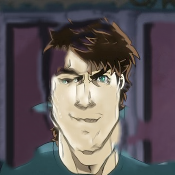

results/expr_6/img_AP.png


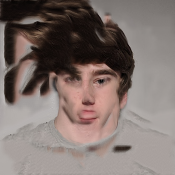

results/expr_6/img_B.png


In [6]:
#@title Run main script
direc = direc + 1
!python main.py --resize_ratio 0.5 --weight 2 --img_A_path image/ima.png --img_BP_path image/imb.png --use_cuda True
display(picture("results/expr_" + str(direc) + "/img_AP.png"))
print("results/expr_" + str(direc) + "/img_AP.png")
display(picture("results/expr_" + str(direc) + "/img_B.png"))
print("results/expr_" + str(direc) + "/img_B.png")